<a href="https://colab.research.google.com/github/Aswathyvsajeev/Parkinson-prediction/blob/main/Parkinson's_disease_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [ ]:


pd. set_option('display.max_rows', 400)
pd. set_option('display.max_columns', 400)


# Importing/Exploring the dataset

In [ ]:
dataset = pd.read_csv('parkinsons.csv')



In [ ]:
dataset['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

# Visualizing the Data

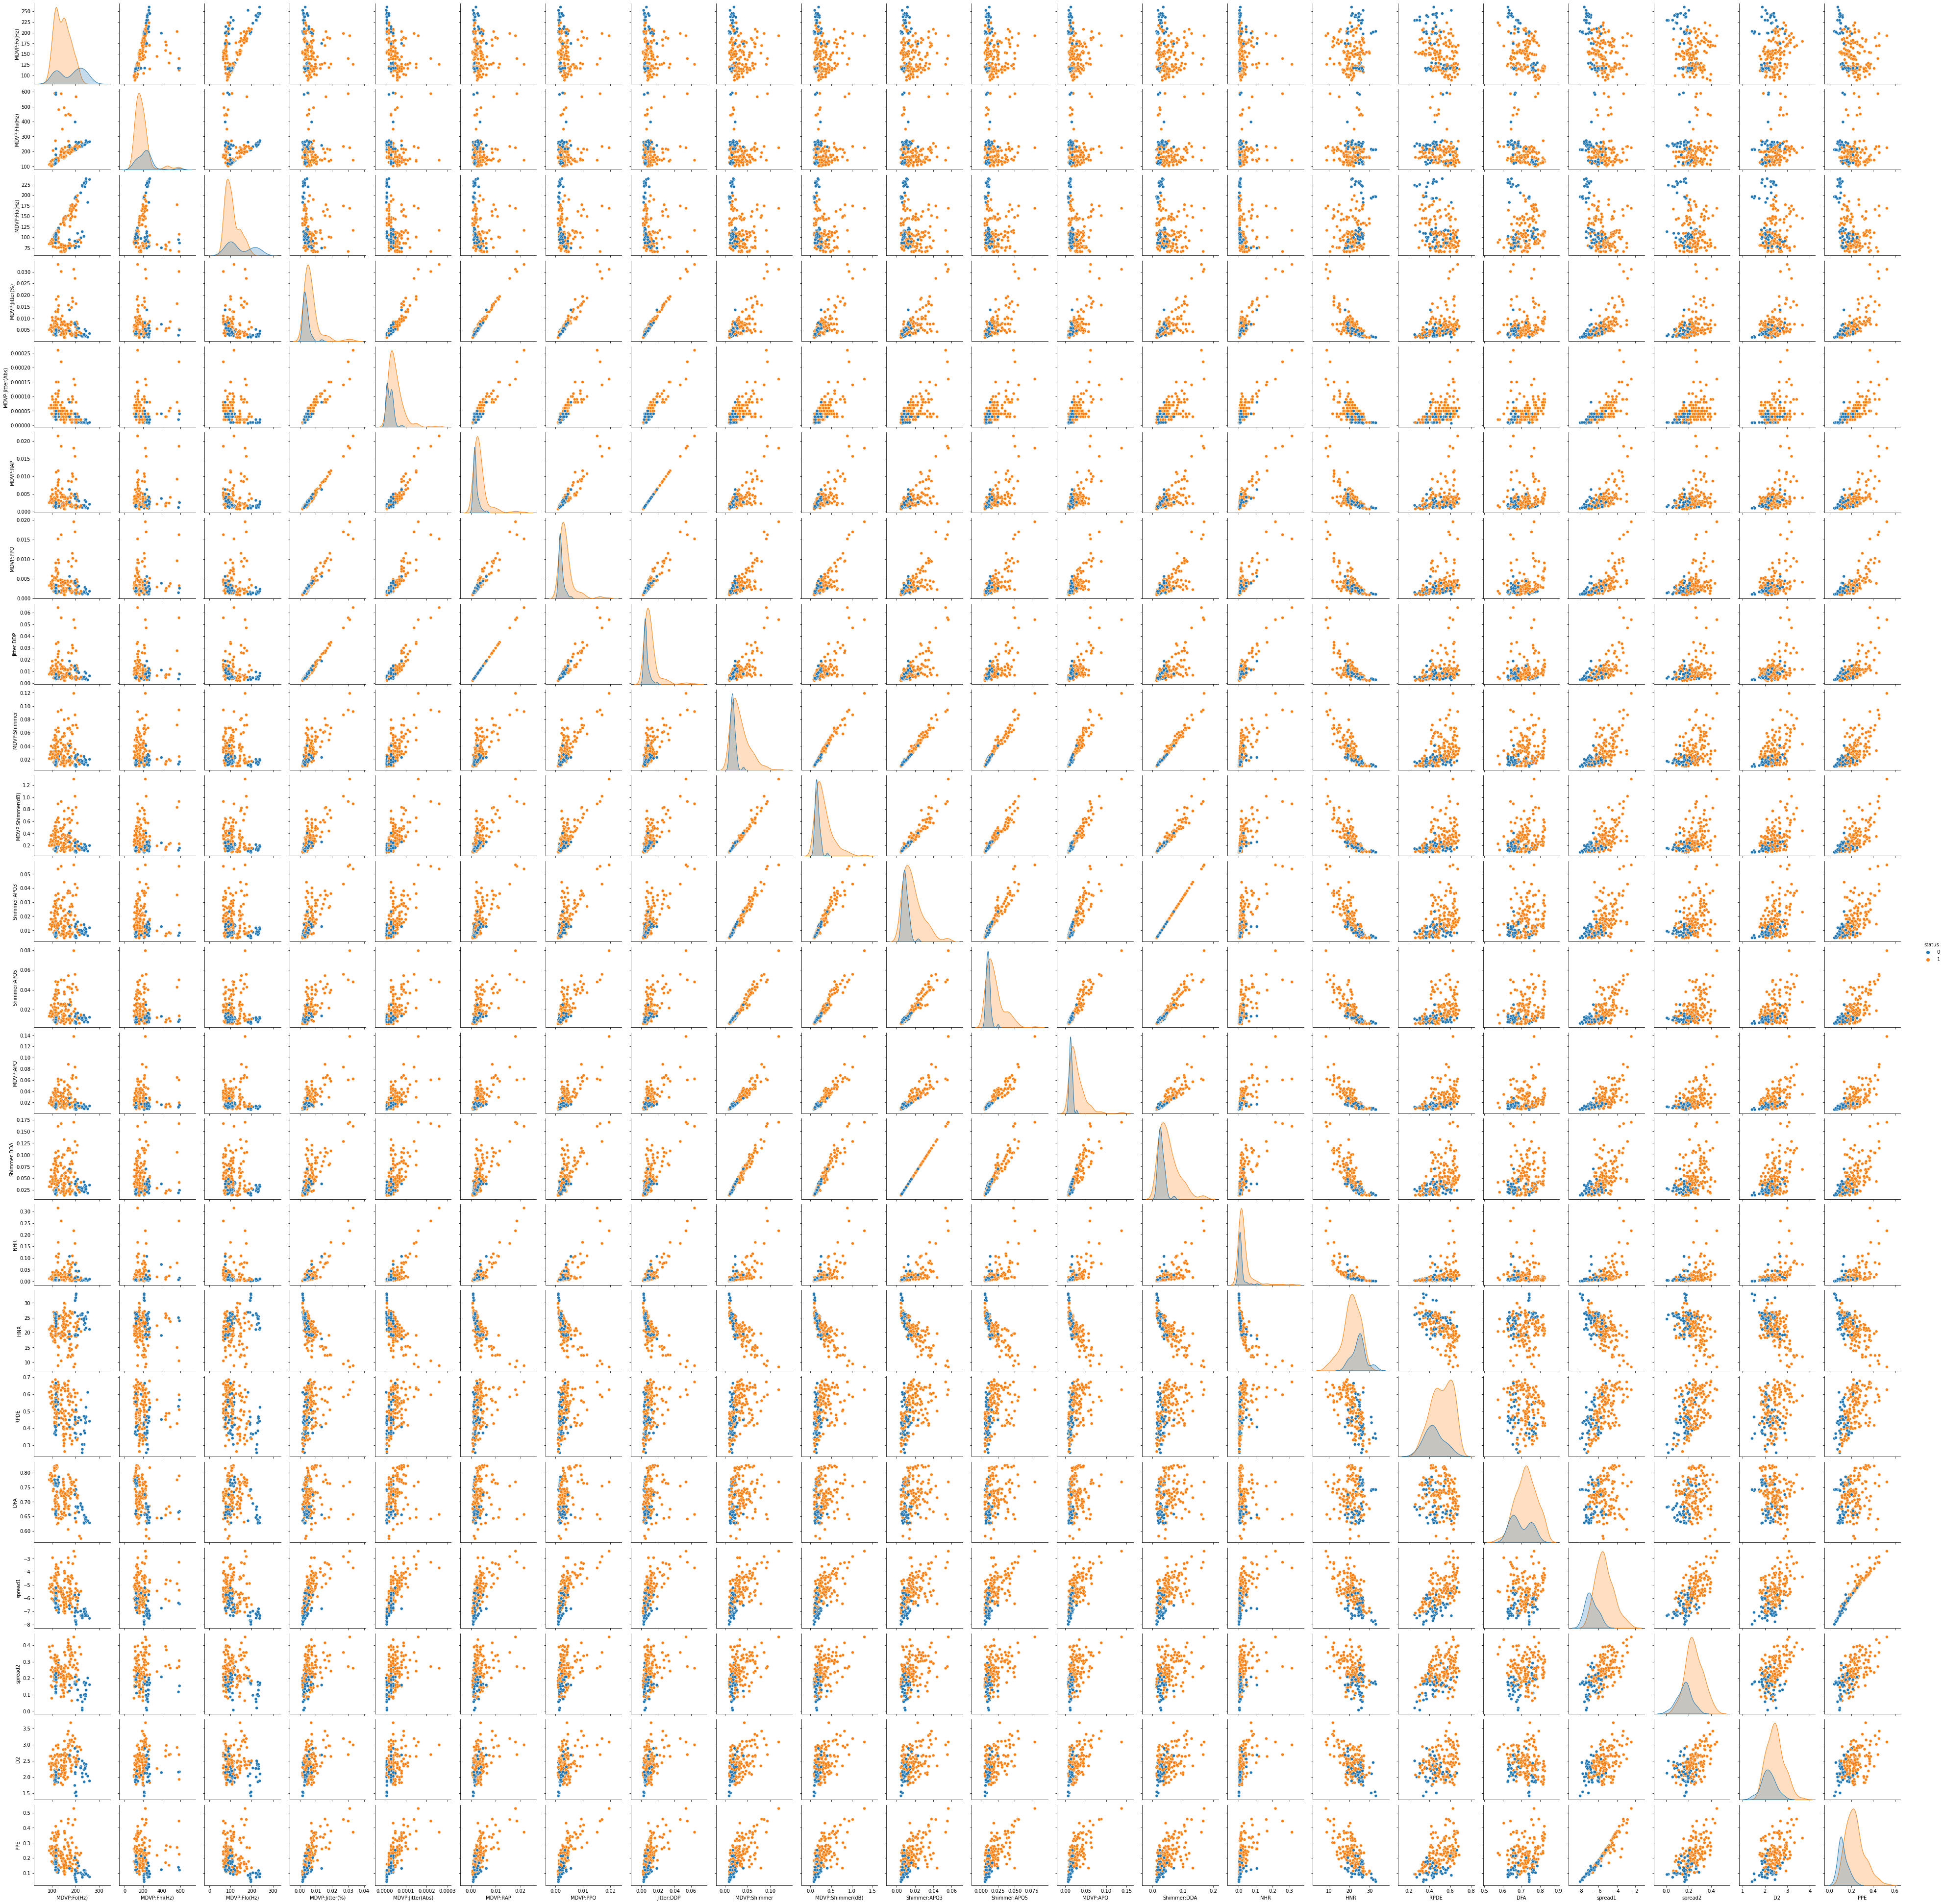

In [ ]:
sns.pairplot(dataset,hue='status')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


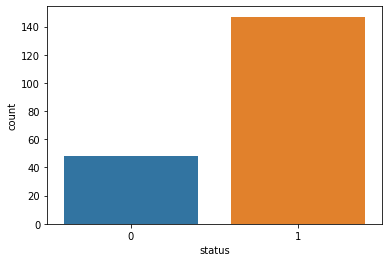

In [ ]:
sns.countplot(dataset['status'])

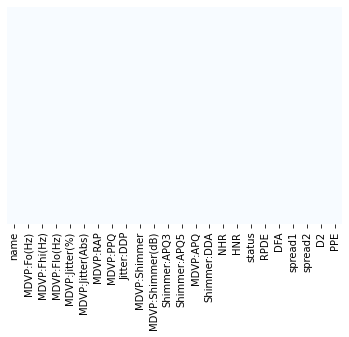

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='Blues')   # There is no missing values in the dataset.

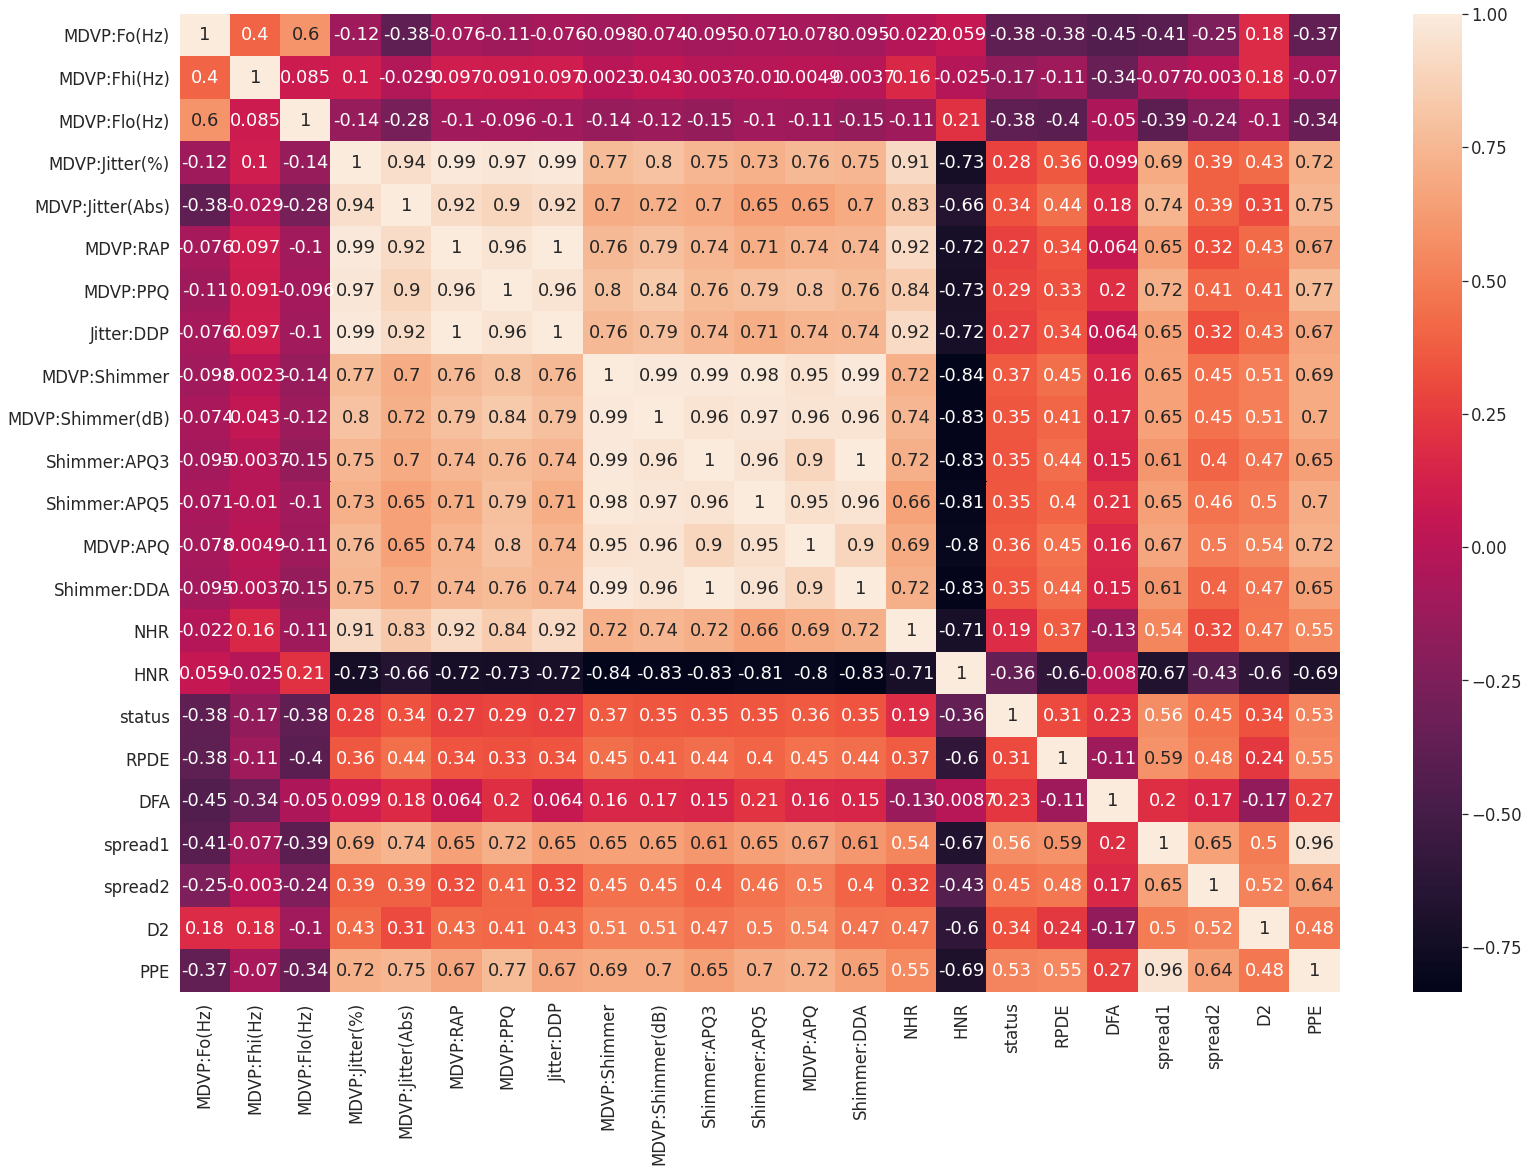

In [ ]:
plt.figure(figsize= (26,18))
sns.set(font_scale=1.5)
g=sns.heatmap(dataset.corr(),annot=True)
  # To check the correlation between variables

# Creating Training and Testing Dataset

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23]].values
y = dataset.iloc[:,17].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

# K-Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors= 5,p= 2,metric='minkowski')


In [ ]:
#Cross validation

kfold_n = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
accuracies_k = cross_val_score(estimator = classifier1, X = X_train, y = y_train,cv = kfold_n)

print("Accuracy: {:.2f} %".format(accuracies_k.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_k.std()*100))


Accuracy: 89.62 %
Standard Deviation: 7.12 %


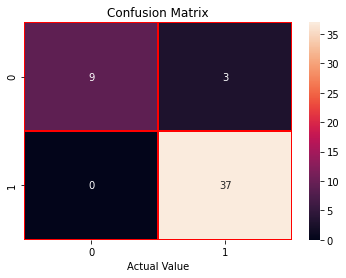

In [ ]:
#Confusion Matrix
classifier1.fit(X_train,y_train)
y_pred1 = classifier1.predict(X_test)
cm_k= confusion_matrix(y_test,y_pred1)
ax=plt.subplot()
sns.heatmap(cm_k,annot=True,linewidth=0.5,linecolor='red',ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred1).ravel()
print("True negative {}".format(tn))
print("False positive {}".format(fp))
print("False negative {}".format(fn))
print("True positve {}".format(tp))

True negative 9
False positive 3
False negative 0
True positve 37


In [ ]:
#Sensitivity/Recall
sensitivity = float(tp)/(float(tp)+float(fn))
print ('Sensitivy/recall (TP/TP+FN): {:.5f}'.format(sensitivity))
#False positive rate
print ('False positive rate (FP/FP+TN): {:.5f}'.format(float(fp)/(float(fp)+float(tn))))
print ('False positive rate (1-specificity): {:.5f}'.format(1-(float(tn)/(float(tn)+float(fp)))))


Sensitivy/recall (TP/TP+FN): 1.00000
False positive rate (FP/FP+TN): 0.25000
False positive rate (1-specificity): 0.25000


In [ ]:
#Specificity
specificity = float(tn)/(float(tn)+float(fp))
print('Specificity (TN/TN+FP): {:.5f}'.format(specificity))
#False negative rate
print('False negative rate (FN/FN+TP): {:.5f}'.format(float(fn)/(float(fn)+tp)))
print('False negative rate (1-sensitivity): {:.5f}'.format(1-sensitivity))

Specificity (TN/TN+FP): 0.75000
False negative rate (FN/FN+TP): 0.00000
False negative rate (1-sensitivity): 0.00000


In [ ]:
#Precision
precision = float(tp)/(float(tp)+float(fp))
print('precision (TP/TP+FP): {:.5f}'.format(precision))

precision (TP/TP+FP): 0.92500


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.93      1.00      0.96        37

    accuracy                           0.94        49
   macro avg       0.96      0.88      0.91        49
weighted avg       0.94      0.94      0.94        49



In [ ]:
#F1 score
print('F1 score (2*(Recall*Precision)/(Recall+Precision)): {}'.format(2*(sensitivity*precision)/(sensitivity+precision)))
print('F1 score): {}'.format(f1_score(y_test, y_pred1, average=None)))

F1 score (2*(Recall*Precision)/(Recall+Precision)): 0.961038961038961
F1 score): [0.85714286 0.96103896]


## Support Vector Machine 

In [ ]:
from sklearn.svm import SVC
classifier2= SVC(kernel = 'linear',random_state = 14)


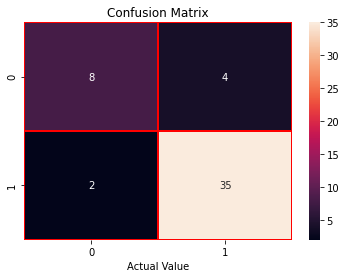

In [ ]:
#Confusion Matrix
classifier2.fit(X_train,y_train)
y_pred2 = classifier2.predict(X_test)
cm_svc= confusion_matrix(y_test,y_pred2)
ax=plt.subplot()
sns.heatmap(cm_svc,annot=True,linewidth=0.5,linecolor='red',ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [ ]:
#Cross validation

kfold_s = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
accuracies_s = cross_val_score(estimator = classifier2, X = X_train, y = y_train,cv = kfold_s)

print("Accuracy: {:.2f} %".format(accuracies_s.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_s.std()*100))

Accuracy: 78.71 %
Standard Deviation: 9.76 %


In [ ]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_pred2).ravel()
print("True negative {}".format(tn2))
print("False positive {}".format(fp2))
print("False negative {}".format(fn2))
print("True positve {}".format(tp2))

True negative 8
False positive 4
False negative 2
True positve 35


In [ ]:
#Sensitivity/Recall
sensitivity2 = float(tp2)/(float(tp2)+float(fn2))
print ('Sensitivy/recall (TP/TP+FN): {:.5f}'.format(sensitivity2))
#False positive rate
print ('False positive rate (FP/FP+TN): {:.5f}'.format(float(fp2)/(float(fp2)+float(tn2))))
print ('False positive rate (1-specificity): {:.5f}'.format(1-(float(tn2)/(float(tn2)+float(fp2)))))

Sensitivy/recall (TP/TP+FN): 0.94595
False positive rate (FP/FP+TN): 0.33333
False positive rate (1-specificity): 0.33333


In [ ]:
#Specificity
specificity2 = float(tn2)/(float(tn2)+float(fp2))
print('Specificity (TN/TN+FP): {:.5f}'.format(specificity2))
#False negative rate
print('False negative rate (FN/FN+TP): {:.5f}'.format(float(fn2)/(float(fn2)+tp2)))
print('False negative rate (1-sensitivity): {:.5f}'.format(1-sensitivity2))

Specificity (TN/TN+FP): 0.66667
False negative rate (FN/FN+TP): 0.05405
False negative rate (1-sensitivity): 0.05405


In [ ]:
#Precision
precision2 = float(tp2)/(float(tp2)+float(fp2))
print('precision (TP/TP+FP): {:.5f}'.format(precision2))

precision (TP/TP+FP): 0.89744


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.90      0.95      0.92        37

    accuracy                           0.88        49
   macro avg       0.85      0.81      0.82        49
weighted avg       0.87      0.88      0.87        49



In [ ]:
#F1 score
print('F1 score (2*(Recall*Precision)/(Recall+Precision)): {}'.format(2*(sensitivity2*precision2)/(sensitivity2+precision2)))
print('F1 score): {}'.format(f1_score(y_test, y_pred1, average=None)))

F1 score (2*(Recall*Precision)/(Recall+Precision)): 0.9210526315789475
F1 score): [0.85714286 0.96103896]


# Artificial Neural Network**

Initializing the ANN 

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
#ann = tf.keras.models.Sequential()


tf.random.set_seed(7)

In [ ]:
def built_classifier():
  ann = Sequential()
  ann.add(Dense(units=16,activation='relu',input_dim=22))
  ann.add(Dense(units=8,activation='relu'))
  
  ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
  ann.compile(optimizer='adam',loss='binary_crossentropy' ,metrics= ['accuracy'])
  return ann

#seed = 7
#np.random.seed(seed)
ann = KerasClassifier(build_fn = built_classifier,batch_size =2,epochs= 100)


In [ ]:
ann.fit(X_train,y_train,epochs=100)


Epoch 1/100
73/73 [==============================] - 13s 864us/step - loss: 0.7519 - accuracy: 0.3942
Epoch 2/100
73/73 [==============================] - 0s 976us/step - loss: 0.6038 - accuracy: 0.6927
Epoch 3/100
73/73 [==============================] - 0s 927us/step - loss: 0.5311 - accuracy: 0.8469
Epoch 4/100
73/73 [==============================] - 0s 946us/step - loss: 0.4670 - accuracy: 0.8697
Epoch 5/100
73/73 [==============================] - 0s 855us/step - loss: 0.4664 - accuracy: 0.8091
Epoch 6/100
73/73 [==============================] - 0s 913us/step - loss: 0.3590 - accuracy: 0.8837
Epoch 7/100
73/73 [==============================] - 0s 865us/step - loss: 0.4451 - accuracy: 0.7609
Epoch 8/100
73/73 [==============================] - 0s 869us/step - loss: 0.3336 - accuracy: 0.8794
Epoch 9/100
73/73 [==============================] - 0s 947us/step - loss: 0.3037 - accuracy: 0.8966
Epoch 10/100
73/73 [==============================] - 0s 908us/step - loss: 0.3354 - accur

In [ ]:
y_pred6=ann.predict(X_test)
from sklearn.metrics import confusion_matrix
cm6= confusion_matrix(y_test,y_pred6)
ax=plt.subplot()
sns.heatmap(cm6,annot=True,linewidth=0.5,linecolor='red',ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.xlabel("Actual Value")
plt.show()

In [ ]:
#Cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
accuracies = cross_val_score(estimator = ann, X = X_train, y = y_train,cv = kfold)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Epoch 1/100
66/66 [==============================] - 1s 927us/step - loss: 0.7544 - accuracy: 0.7200
Epoch 2/100
66/66 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.7048
Epoch 3/100
66/66 [==============================] - 0s 977us/step - loss: 0.5046 - accuracy: 0.7773
Epoch 4/100
66/66 [==============================] - 0s 968us/step - loss: 0.4090 - accuracy: 0.8468
Epoch 5/100
66/66 [==============================] - 0s 945us/step - loss: 0.3831 - accuracy: 0.8408
Epoch 6/100
66/66 [==============================] - 0s 877us/step - loss: 0.4014 - accuracy: 0.7984
Epoch 7/100
66/66 [==============================] - 0s 973us/step - loss: 0.3462 - accuracy: 0.8861
Epoch 8/100
66/66 [==============================] - 0s 930us/step - loss: 0.3193 - accuracy: 0.8883
Epoch 9/100
66/66 [==============================] - 0s 916us/step - loss: 0.3277 - accuracy: 0.8375
Epoch 10/100
66/66 [==============================] - 0s 924us/step - loss: 0.3442 - accuracy

In [ ]:

tn6, fp6, fn6, tp6 = confusion_matrix(y_test,y_pred6).ravel()
print("True negative {}".format(tn6))
print("False positive {}".format(fp6))
print("False negative {}".format(fn6))
print("True positve {}".format(tp6))

True negative 10
False positive 2
False negative 0
True positve 37


In [ ]:
#Sensitivity/Recall
sensitivity6 = float(tp6)/(float(tp6)+float(fn6))
print ('Sensitivy/recall (TP/TP+FN): {:.5f}'.format(sensitivity6))
#False positive rate
print ('False positive rate (FP/FP+TN): {:.5f}'.format(float(fp6)/(float(fp6)+float(tn6))))
print ('False positive rate (1-specificity): {:.5f}'.format(1-(float(tn6)/(float(tn6)+float(fp6)))))

Sensitivy/recall (TP/TP+FN): 1.00000
False positive rate (FP/FP+TN): 0.16667
False positive rate (1-specificity): 0.16667


In [ ]:
#Specificity
specificity6 = float(tn6)/(float(tn6)+float(fp6))
print('Specificity (TN/TN+FP): {:.5f}'.format(specificity6))
#False negative rate
#print('False negative rate (FN/FN+TP): {:.5f}'.format(float(fn)/(float(fn)+tp)))
#print('False negative rate (1-sensitivity): {:.5f}'.format(1-sensitivity))

Specificity (TN/TN+FP): 0.83333


In [ ]:
#Precision
precision6 = float(tp6)/(float(tp6)+float(fp6))
print('precision (TP/TP+FP): {:.5f}'.format(precision6))


precision (TP/TP+FP): 0.94872


In [ ]:
#F1 score
print('F1 score (2*(Recall*Precision)/(Recall+Precision)): {}'.format(2*(sensitivity6*precision6)/(sensitivity6+precision6)))
print('F1 score): {}'.format(f1_score(y_test, y_pred6, average=None)))

F1 score (2*(Recall*Precision)/(Recall+Precision)): 0.9736842105263158
F1 score): [0.90909091 0.97368421]


In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.95      1.00      0.97        37

    accuracy                           0.96        49
   macro avg       0.97      0.92      0.94        49
weighted avg       0.96      0.96      0.96        49

